In [1]:
import sys
mainpath='c:/Kitti/Dropbox/PHD/Gridshells-EQCS' #location of folders
sys.path.insert(0, mainpath+'/Tekno') #location of python files

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import Tekno as tk
import Types as tp
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd

In [3]:
import importlib #for reloading
importlib.reload(tk)
import Tekno as tk

# Parameters

materially and geometrically linear finite element analysis to determine internal forces

grid shells with various span (L), span-to-height ratio (L/H) and pipe cross-section sizes (D, T)

to see results either load previously calculated and saved results or run analyses

In [5]:
spanA = [20,40,60]

# Load

In [7]:
with pd.HDFStore(mainpath+'/Saved results/Lin_LperH.h5') as store:
    Nmax = store['Nmax'].values
    Nmax2 = store['Nmax2'].values
    Mmax = store['Mmax'].values
    Mmax2 = store['Mmax2'].values
    Nmin = store['Nmin'].values
    Nmin2 = store['Nmin2'].values
    Mmin = store['Mmin'].values
    Mmin2 = store['Mmin2'].values
    rhoA = store['rhoA'].values

# Analysis

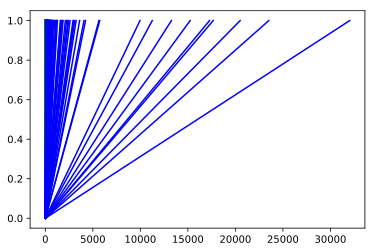

In [7]:
gN     = 16  # number of triangles along each span  
nb     = 4   # number of finite elements along one beam

n=7 # mm CHS cross-section diameter
DStart=50
DStep=50
m=3 # mm CHS cross-section thickness
tStart=5
tStep=5
#print('D: ',np.arange(DStart,DStart+n*DStep,DStep))
#print('t: ',np.arange(tStart,tStart+m*tStep,tStep))

qz = 1.; #kN/m2
MatNL = False
GeomNL = 0
Steps = 2

Nmax  = np.zeros((9, n*m))
Nmax2 = np.zeros((9, n*m))
Mmax  = np.zeros((9, n*m))
Mmax2 = np.zeros((9, n*m))
Nmin  = np.zeros((9, n*m))
Nmin2 = np.zeros((9, n*m))
Mmin  = np.zeros((9, n*m))
Mmin2 = np.zeros((9, n*m))
rhoA  = np.zeros((9, n*m))

i = 0
spanA = [20,40,60]
for ss in spanA:
    for pp in [8,5,3]:  
        Span   = ss  # m span of two-member structure
        LperH = pp
        Height = Span/LperH   # m height at apex
        IO = tp.IterObj(Span, Height, gN, nb, 'q', qz, MatNL, GeomNL, Steps, n, m, DStart, DStep, tStart, tStep)
        Nmin[i], Nmax[i], Mmax[i], rhoA[i], Nmin2[i], Nmax2[i], Mmax2[i], _, _, _, _, _ = tk.Eval(IO)
        i+=1

# Results

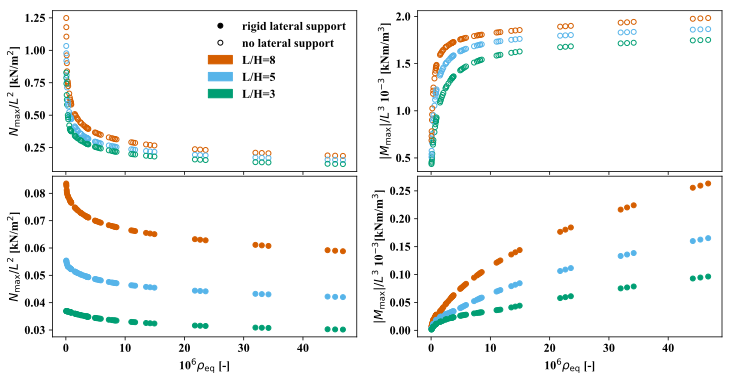

In [9]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 2)
sms = 5
gs.update(hspace=0.03) # set the spacing between axes.

c1=[c/255. for c in [213., 94., 0.]] # vermillion
c2=[c/255. for c in [86, 180, 233]] # sky blue
c3=[c/255. for c in [0, 158, 115]] # bluish green

ax1 = plt.subplot(gs[0, 0])
plt.ylabel('$N_{\\rm max}/L^2$ [kN/m$^2$]')
for i in range(3):
    plt.plot(rhoA[3*i]*1e6,Nmax2[3*i]/spanA[i]**2,'o',c=c1, ms=sms,fillStyle='none')
    plt.plot(rhoA[3*i+1]*1e6,Nmax2[3*i+1]/spanA[i]**2,'o',c=c2, ms=sms,fillStyle='none')
    plt.plot(rhoA[3*i+2]*1e6,Nmax2[3*i+2]/spanA[i]**2,'o',c=c3, ms=sms,fillStyle='none')

b_patch = mpatches.Patch(color=c3, label='L/H=3')
green_patch = mpatches.Patch(color=c2, label='L/H=5')
red_patch = mpatches.Patch(color=c1, label='L/H=8')
om_dot = mlines.Line2D([], [], color='k', marker='o',markersize=sms, label='no lateral support',linestyle='None',fillStyle='none')
o_dot = mlines.Line2D([], [], color='k', marker='o',markersize=sms, label='rigid lateral support',linestyle='None')
plt.legend(handles=[o_dot, om_dot,red_patch,green_patch,b_patch],frameon=False)
    
ax2 = plt.subplot(gs[0, 1])
plt.ylabel('$|M_{\\rm max}|/L^3$ 10$^{-3}$ [kNm/m$^3$]')
for i in range(3):
    plt.plot(rhoA[3*i]*1e6,Mmax2[3*i]/spanA[i]**3*1000,'o',c=c1, ms=sms,fillStyle='none')     # L/H=8
    plt.plot(rhoA[3*i+1]*1e6,Mmax2[3*i+1]/spanA[i]**3*1000,'o',c=c2, ms=sms,fillStyle='none') # L/H=5
    plt.plot(rhoA[3*i+2]*1e6,Mmax2[3*i+2]/spanA[i]**3*1000,'o',c=c3, ms=sms,fillStyle='none') # L/H=3

ax3 = plt.subplot(gs[1, 0])
plt.ylabel('$N_{\\rm max}/L^2$ [kN/m$^2$]')
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
for i in range(3):
    plt.plot(rhoA[3*i]*1e6,Nmax[3*i]/spanA[i]**2,'o',c=c1, ms=sms)
    plt.plot(rhoA[3*i+1]*1e6,Nmax[3*i+1]/spanA[i]**2,'o',c=c2, ms=sms)
    plt.plot(rhoA[3*i+2]*1e6,Nmax[3*i+2]/spanA[i]**2,'o',c=c3, ms=sms)

ax4 = plt.subplot(gs[1, 1])    
plt.ylabel('$|M_{\\rm max}|/L^3$ 10$^{-3}$[kNm/m$^3$]')
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
for i in range(3):
    plt.plot(rhoA[3*i]*1e6,Mmax[3*i]/spanA[i]**3*1000,'o',c=c1, ms=sms)
    plt.plot(rhoA[3*i+1]*1e6,Mmax[3*i+1]/spanA[i]**3*1000,'o',c=c2, ms=sms)
    plt.plot(rhoA[3*i+2]*1e6,Mmax[3*i+2]/spanA[i]**3*1000,'o',c=c3, ms=sms)

plt.savefig('LinLperH.pdf', bbox_inches='tight')

plt.show()

# Save

In [50]:
A_df  = pd.DataFrame(Nmax)
B_df  = pd.DataFrame(Nmax2)
C_df  = pd.DataFrame(Mmax)
D_df  = pd.DataFrame(Mmax2)
E_df  = pd.DataFrame(Nmin)
F_df  = pd.DataFrame(Nmin2)
G_df  = pd.DataFrame(Mmin)
H_df  = pd.DataFrame(Mmin2)
I_df = pd.DataFrame(rhoA)

with pd.HDFStore(maintpath+'/Saved results/Lin_LperH.h5') as store:
    store['Nmax'] = A_df
    store['Nmax2']= B_df
    store['Mmax'] = C_df
    store['Mmax2']= D_df
    store['Nmin'] = E_df
    store['Nmin2']= F_df
    store['Mmin'] = G_df
    store['Mmin2']= H_df
    store['rhoA'] = I_df